# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Nauval Muzaki
- **Email:** m011d4ky2059@bangkit.academy
- **ID Dicoding:** M011D4KY2059

## Menentukan Pertanyaan Bisnis

- How is the distribution of Total Bike users in each month of the year?
- How is the monthly trend of the total bike users in 2011 and 2012?
- Which month of the year has the most users?
- What season affects total bike users the most?
- How is the correlation between Total Bike Users and The Weather of the area?
- if we see in only one day, what time that has the most total bike users?

## Import Semua Packages/Library yang Digunakan

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [56]:
day_df = pd.read_csv("day.csv")
day_df.head() #showing the 5 topmost data in file "day.csv"

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [57]:
hour_df = pd.read_csv("hour.csv")
hour_df.head() #showing the 5 topmost data in  file "hour.csv"

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Assesing Data "day.csv"**

In [58]:
#provides detailed information about the DataFrame structure.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


data type of *dteday* must be datetime, not object

In [59]:
#Checking if there are NAs in dataset
day_df.isna().sum()
#there is no missing value in "day_df"

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

there are no missing value in "day_df"

In [60]:
#Showing the count of duplicate value
print("Duplicate Count: ", day_df.duplicated().sum())

Duplicate Count:  0


In [61]:
#Showing some statistic descriptives of the data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Assesing data "hour.csv"**

In [62]:
#provides detailed information about the DataFrame structure.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


data type of *dteday* must be datetime, not object

In [63]:
#Checking if there are NAs in dataset
hour_df.isna().sum()
#there is no missing value in "day_df"

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

there are no missing values in "hour_df"

In [64]:
print("duplicate count: ", hour_df.duplicated().sum())

duplicate count:  0


In [65]:
#Showing some statistic descriptives of the data
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Cleaning day_df Table**

Change Data Type

In [66]:
#Change Data Type to Correct Type
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

Change The Nominal Value (for easy reading)

In [67]:
#Change the name of the nominal value on 'season' column
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

#Change the name of the nominal value on 'Yr' column (0=2011, 1=2012)
day_df.yr.replace((0,1), (2011,2012), inplace=True)

#Change the name of the nominal value 'holiday'
day_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

#Change the name of the nominal value on 'mnth'
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

#Change the name of the nominal value on 'weathersit'
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_Snow','Heavy_Rain'), inplace=True)

#Change the name of the nominal value 'weekday'
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

#Change the name of the nominal value 'workingday'
day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

#Change name 'cnt' column to 'total'
day_df.rename(columns={'cnt': 'total'}, inplace=True)

In [68]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  total       731 non-null    int64         
dtypes: category(6), datetime64

Duplicate Data

In [69]:
day_df.duplicated().sum()
#Checking duplicated data, and there are no duplicated data

0

Missing Values

In [70]:
day_df.isna().sum()
#Checking Missing value in data, and there are no missing value in data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

Innacurate Value

In [71]:
day_df.describe()
#Checking Inaccurate value in the data, and all the values are normal

,instant,yr,temp,atemp,hum,windspeed,casual,registered,total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Cleaning Tabel hour_df**

Change Data Type

In [72]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday']) #Change Data type to Datetime
hour_df['season'] = hour_df.season.astype('category') #Change Data type to Categorical Variable (this is for ordered result in visualization)
hour_df['mnth'] = hour_df.mnth.astype('category') #Change Data type to Categorical Variable (this is for ordered result in visualization)
hour_df['holiday'] = hour_df.holiday.astype('category') #Change Data type to Categorical Variable (this is for ordered result in visualization)
hour_df['weekday'] = hour_df.weekday.astype('category') #Change Data type to Categorical Variable (this is for ordered result in visualization)
hour_df['workingday'] = hour_df.workingday.astype('category') #Change Data type to Categorical Variable (this is for ordered result in visualization)
hour_df['weathersit'] = hour_df.weathersit.astype('category') #Change Data type to Categorical Variable (this is for ordered result in visualization)

Change The Nominal Value (for easy reading)

In [73]:
#Change the name of the nominal value on 'season' column
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

#Change the name of the nominal value on 'Yr' column (0=2011, 1=2012)
hour_df.yr.replace((0,1), (2011,2012), inplace=True)

#Change the name of the nominal value 'holiday'
hour_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

#Change the name of the nominal value on 'mnth'
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

#Change the name of the nominal value on 'weathersit'
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_Snow','Heavy_Rain'), inplace=True)

#Change the name of the nominal value 'weekday'
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

#Change the name of the nominal value 'workingday'
hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

#Change name 'cnt' column to 'total'
hour_df.rename(columns={'cnt': 'total'}, inplace=True)

In [74]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  total       17379 non-

Duplicate Data

In [75]:
hour_df.duplicated().sum()
#there are no duplicated data

0

Missing values

In [76]:
hour_df.isna().sum()
#There are no missing values in the data

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

Innacurate Data

In [77]:
hour_df.describe()
#Checking Inaccurate value in the data, and all the values are normal

,instant,yr,hr,temp,atemp,hum,windspeed,casual,registered,total
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,2011.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


There are no anomalies in both of the data, so te data is now clean and ready for being explored

## Exploratory Data Analysis (EDA)

### Explore Day Table

**Eksplore day_df Table**

In [78]:
#Describe all tables columns in the data
day_df.describe(include="all")

<ipython-input-78-fb142a069ba0>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,Jan,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [79]:
#Descriptive Statistics for Casual User, Registered User, and Total User

column_user = ["casual", "registered", "total"]
day_df[column_user].describe()

,casual,registered,total
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


In [80]:
#seeing the count of Casual User, registered User, and Total User based on Year

day_df.groupby('yr').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'})

,casual,registered,total
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [81]:
#seeing the average of Casual User, registered User, and Total User based on Year

day_df.groupby('yr').agg({'casual': 'mean', 'registered': 'mean', 'total':'mean'})

,casual,registered,total
yr,,,
2011,677.402740,2728.358904,3405.761644
2012,1018.483607,4581.450820,5599.934426


In [82]:
#seeing the count of Casual User, registered User, and Total User based on month

day_df.groupby('mnth').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'})

,casual,registered,total
mnth,,,
Jan,12042,122891,134933
Feb,14963,136389,151352
Mar,44444,184476,228920
Apr,60802,208292,269094
May,75285,256401,331686
Jun,73906,272436,346342
Jul,78157,266791,344948
Aug,72039,279155,351194
Sep,70323,275668,345991


In [83]:
#seeing the count of Casual User, registered User, and Total User based on weekday

day_df.groupby('weekday').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'})


,casual,registered,total
weekday,,,
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Thursday,61460,423935,485395
Friday,78238,409552,487790
Saturday,153852,323955,477807


In [84]:
#seeing the average of Casual User, registered User, and Total User based on weekday

day_df.groupby('weekday').agg({'casual': 'mean', 'registered': 'mean', 'total':'mean'})

,casual,registered,total
weekday,,,
Sunday,1338.295238,2890.533333,4228.828571
Monday,674.133333,3663.990476,4338.123810
Tuesday,556.182692,3954.480769,4510.663462
Wednesday,551.144231,3997.394231,4548.538462
Thursday,590.961538,4076.298077,4667.259615
Friday,752.288462,3938.000000,4690.288462
Saturday,1465.257143,3085.285714,4550.542857


In [85]:
#seeing the count of Casual User, registered User, and Total User based on working day (1) or not working day (0)

day_df.groupby('workingday').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'})

,casual,registered,total
workingday,,,
No,316732,683537,1000269
Yes,303285,1989125,2292410


In [86]:
#seeing the average of Casual User, registered User, and Total User based on working day (1) or not working day (0)

day_df.groupby('workingday').agg({'casual': 'mean', 'registered': 'mean', 'total':'mean'})

,casual,registered,total
workingday,,,
No,1371.134199,2959.034632,4330.168831
Yes,606.570000,3978.250000,4584.820000


In [87]:
#seeing the count of Casual User, registered User, and Total User based on weathersit (weather situation)

day_df.groupby('weathersit').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'})

,casual,registered,total
weathersit,,,
Clear,446346,1811606,2257952
Misty,169776,827082,996858
Light_Snow,3895,33974,37869


In [88]:
#seeing the average of Casual User, registered User, and Total User based on weathersit (weather situation)

day_df.groupby('weathersit').agg({'casual': 'mean', 'registered': 'mean', 'total':'mean'})

,casual,registered,total
weathersit,,,
Clear,964.030238,3912.755940,4876.786177
Misty,687.352227,3348.510121,4035.862348
Light_Snow,185.476190,1617.809524,1803.285714


In [89]:
#seeing the average Casual User, registered User, and Total User based on Season

day_df.groupby('season').agg({'casual': 'mean', 'registered': 'mean', 'total': 'mean'})

,casual,registered,total
season,,,
Spring,334.928177,2269.204420,2604.132597
Summer,1106.097826,3886.233696,4992.331522
Fall,1202.611702,4441.691489,5644.303191
Winter,729.112360,3999.050562,4728.162921


In [90]:
#seeing the average Temperature and Wind Speed based on Season

#multiply by scalar number (info in readme file) to return it into original value
day_df['temp_normal'] = day_df['temp']*41
day_df['atemp_normal'] = day_df['atemp']*50
day_df['windspeed_normal'] = day_df['windspeed']*67
day_df.groupby('season').agg({'temp_normal': 'mean', 'atemp_normal': 'mean', 'windspeed_normal': 'mean'})

,temp_normal,atemp_normal,windspeed_normal
season,,,
Spring,12.207650,14.845697,14.373984
Summer,22.320611,26.015366,13.634978
Fall,28.958682,32.794920,11.530366
Winter,17.339148,20.776937,11.523637


### Explore Hour Table

**Explore hour_df Table**

In [91]:
#Describe All columns in the data
hour_df.describe(include="all")

<ipython-input-91-9062d70a5512>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [92]:
#seeing the count of Casual User, registered User, and Total User based on Hour

hour_df.groupby('hr').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'})

,casual,registered,total
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [93]:
#seeing the Average of Casual User, registered User, and Total User based on Hour

hour_df.groupby('hr').agg({'casual': 'mean', 'registered': 'mean', 'total':'mean'})

,casual,registered,total
hr,,,
0,10.158402,43.739669,53.898072
1,6.504144,26.871547,33.375691
2,4.772028,18.097902,22.869930
3,2.715925,9.011478,11.727403
4,1.253945,5.098996,6.352941
5,1.411437,18.478382,19.889819
6,4.161379,71.882759,76.044138
7,11.055021,201.009629,212.064649
8,21.679505,337.331499,359.011004


In [94]:
#Making count of 3-way contingency table for Year, Season, Casual User, Registered User, And Total User
hour_df.groupby(by=["yr", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})

casual  registered   total
yr   season                            
2011 Spring   21425      128575  150000
     Summer   77564      269752  347316
     Fall     95450      324200  419650
     Winter   52813      273324  326137
2012 Spring   39197      282151  321348
     Summer  125958      445315  571273
     Fall    130641      510838  641479
     Winter   76969      438507  515476

In [95]:
#Making Average of 3-way contingency table for Year, Season, Casual User, Registered User, And Total User
hour_df.groupby(by=["yr", "season"]).agg({
    "casual": "mean",
    "registered": "mean",
    "total": "mean"
})

casual  registered       total
yr   season                                   
2011 Spring  10.360251   62.173598   72.533849
     Summer  35.208352  122.447571  157.655924
     Fall    42.611607  144.732143  187.343750
     Winter  24.748360  128.080600  152.828960
2012 Spring  18.029899  129.784269  147.814167
     Summer  57.097915  201.865367  258.963282
     Fall    57.908245  226.435284  284.343528
     Winter  36.686845  209.011916  245.698761

###Explore Both Data

In [96]:
#Combine Both Data to see what will we get if we combine them

all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,total_y
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,0.344167,...,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,0.344167,...,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

###Pertanyaan 1: How is the distribution of Total Bike users in each month of the year?

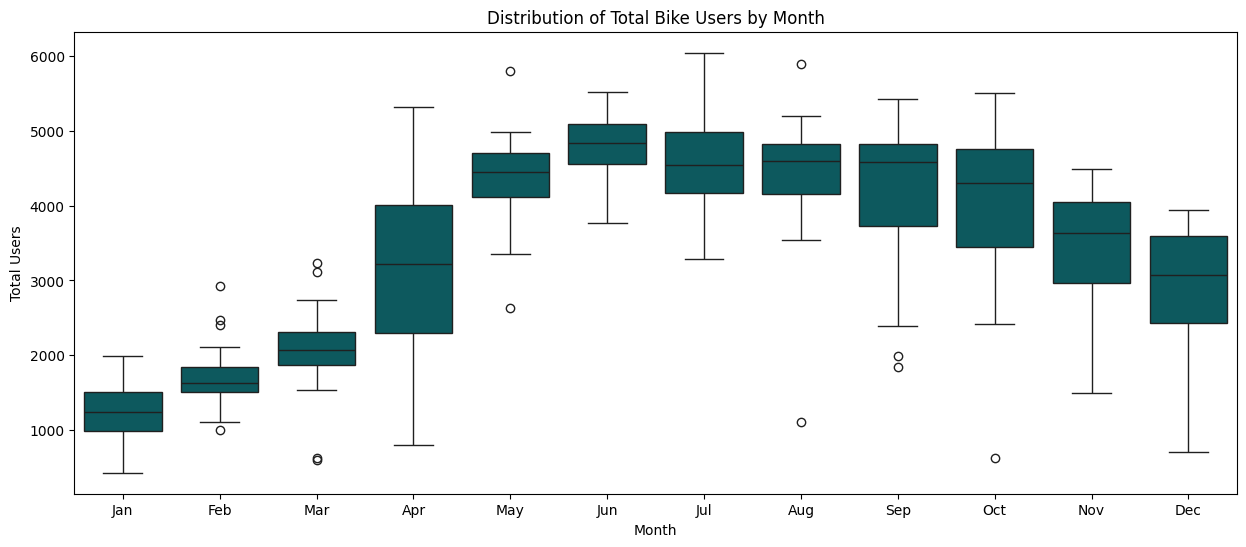

In [97]:
# Set the plot size
plt.figure(figsize=(15, 6))

# make boxplot of 2011
day_2011 = day_df[day_df['yr'] == 2011]
sns.boxplot(x='mnth', y='total', data=day_2011, color="#00656B")

# give lable x dan y also the title
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Distribution of Total Bike Users by Month')

plt.show()

From the boxplot above, we can see how the total number of bike users in 2011 is distributed and having some outliers in each month of the year, also the highest bike users is on June.

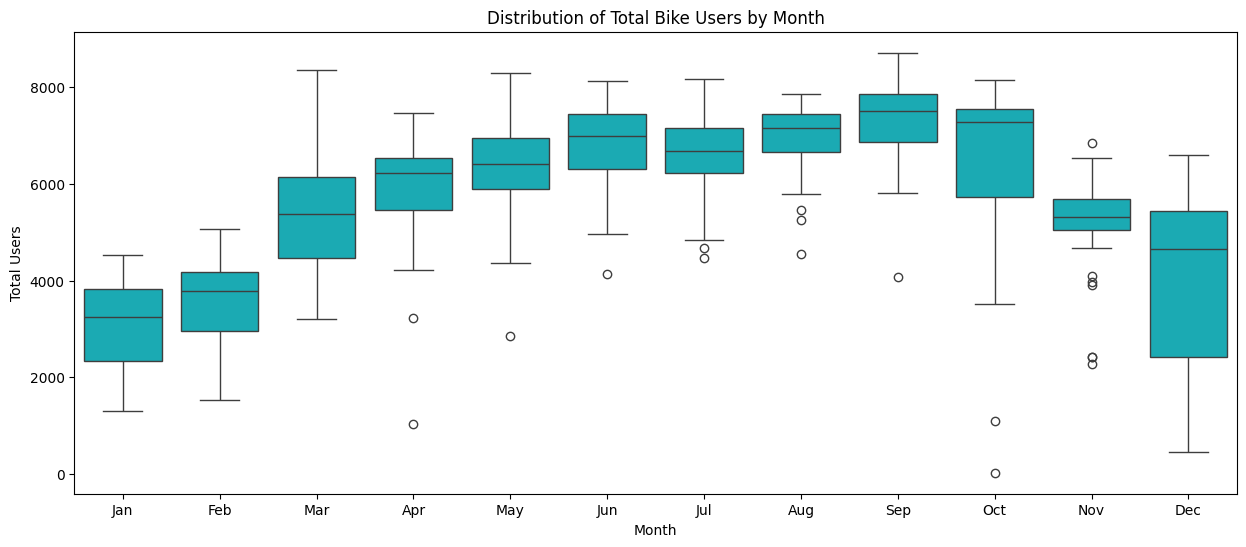

In [98]:
# Set the plot size
plt.figure(figsize=(15, 6))

# make boxplot of 2012
day_2012 = day_df[day_df['yr'] == 2012]
sns.boxplot(x='mnth', y='total', data=day_2012, color="#01C1CD")

# give lable x and y also the title
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Distribution of Total Bike Users by Month')

plt.show()

From the boxplot above, we can see how the total number of bike users in 2012 is distributed and having some outliers in each month of the year, also the highest bike users is on September.

### Pertanyaan 2: How is the monthly trend of the total bike users in 2011 and 2012?

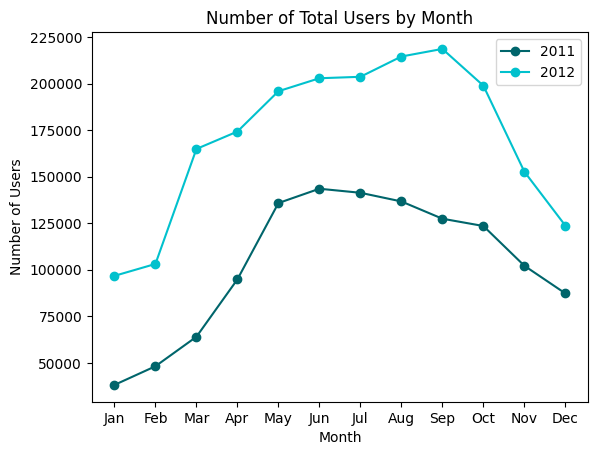

In [99]:
# Split data into 2 years (2011 and 2012)
day_2011 = day_df[day_df['yr'] == 2011]
day_2012 = day_df[day_df['yr'] == 2012]

#seeing the count of Casual User, registered User, and Total User based on month for each years
monthly_trend_2011 = day_2011.groupby('mnth').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'})
monthly_trend_2012 = day_2012.groupby('mnth').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'})

# Making Line Plot for year 2011 and 2012
plt.plot(monthly_trend_2011.index, monthly_trend_2011['total'], marker='o', label='2011', color='#00656B')
plt.plot(monthly_trend_2011.index, monthly_trend_2012['total'], marker='o', label='2012', color='#01C1CD')

# Add lable and title
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Number of Total Users by Month')
plt.legend()

plt.show()

based on the line chart above, we can see that the trend of total bike users in 2011 is having uptrend until June, and having down after June to December.

For total bike users in 2012 we can see that the trend is still indicating uptrend until September and have some sharp downtrend until December

### Pertanyaan 3: Which month of the year has the most users?

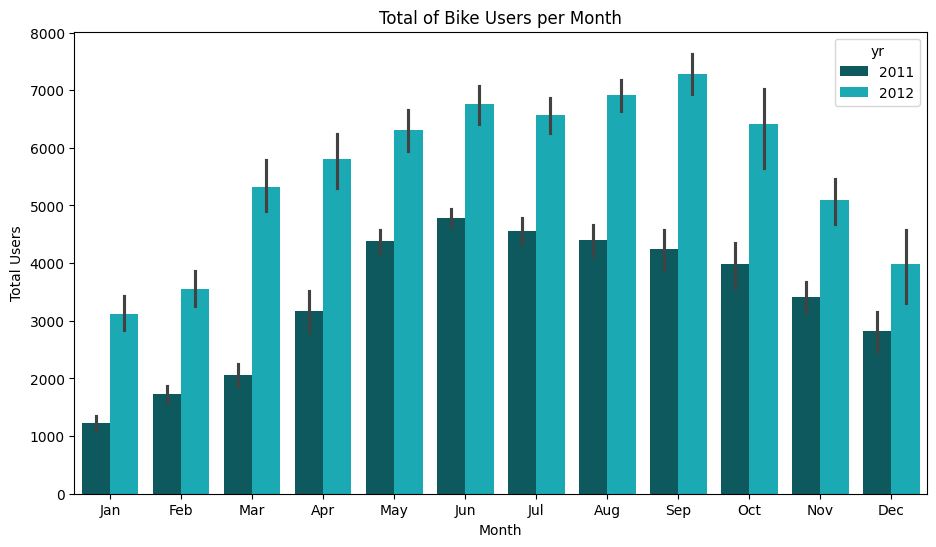

In [100]:
# Determine the plot size
plt.figure(figsize=(11,6))

# Choosing the Color for bar plot
palette_colors = ["#00656B", "#01C1CD"]

# make the barplot with the color we choose
sns.barplot(x='mnth', y='total', data=day_df, hue='yr', palette=palette_colors)

plt.xlabel("Month")
plt.ylabel("Total Users")
plt.title("Total of Bike Users per Month")

plt.show()

Based on the Bar plot above, we can see that the most total bike users in 2011 is on June and for the most total bike users in 2012 is on September

### Pertanyaan 4: What season affects total bike users the most?

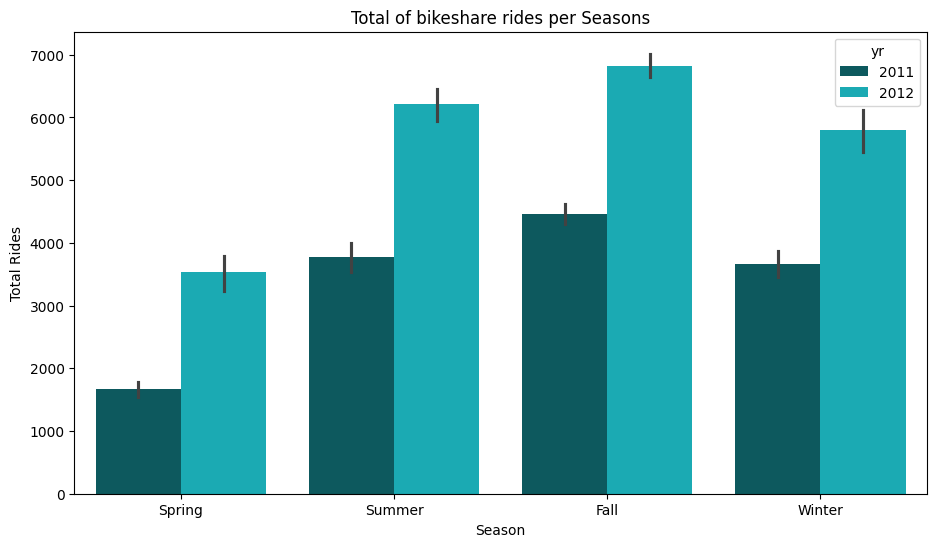

In [101]:
# Determine the plot size
plt.figure(figsize=(11,6))

# Choosing the Color for bar plot
palette_colors = ["#00656B", "#01C1CD"]

# make the barplot with the color we choose
sns.barplot(x='season', y='total', data=day_df, hue='yr', palette=palette_colors)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Seasons")

plt.show()

Based on the year 2011 and 2012, both have the most users in Fall Season and have the least users in Spring Season.

###Pertanyaan 5: How is the correlation between Total Bike Users and The Weather of the area?

0.7712141978934427

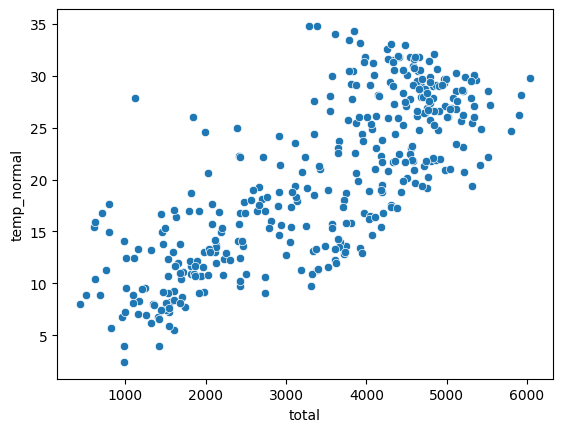

In [102]:
#make data only in 2011
day_2011 = day_df[day_df['yr'] == 2011]

# Hitung korelasi menggunakan metode Pearson
correlation = day_2011['total'].corr(day_2011['temp_normal'])

# Visualisasikan korelasi
sns.scatterplot(x='total', y='temp_normal', data=day_2011)
correlation

Based on the scatter plot above, we can see that while the total bike users is getting higher, the temperature is also getting higher. It means the correlation between total bike users and the temperature of the area has a positive correlation. It's supported by the high number of 0.77 indicates high positive correlation

0.713793198883803

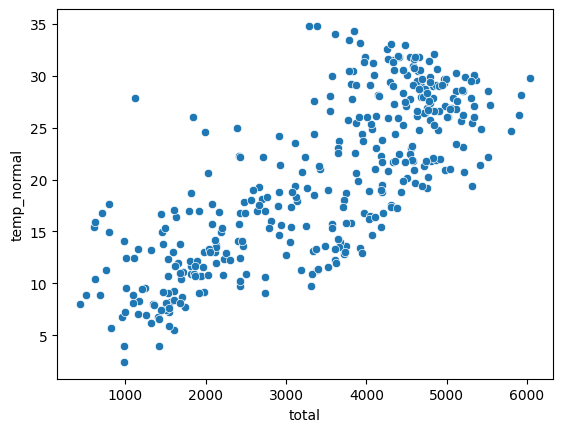

In [103]:
#make data only in 2012
day_2012 = day_df[day_df['yr'] == 2012]

# Hitung korelasi menggunakan metode Pearson
correlation = day_2012['total'].corr(day_2012['temp_normal'])

# Visualisasikan korelasi
sns.scatterplot(x='total', y='temp_normal', data=day_2011)
correlation

Based on the scatter plot above, we can see that while the total bike users is getting higher, the temperature is also getting higher. It means the correlation between total bike users and the temperature of the area has a positive correlation. It's supported by the high number of 0.71 indicates high positive correlation

###Pertanyaan 6: if we see in only one day, what time that has the most total bike users?

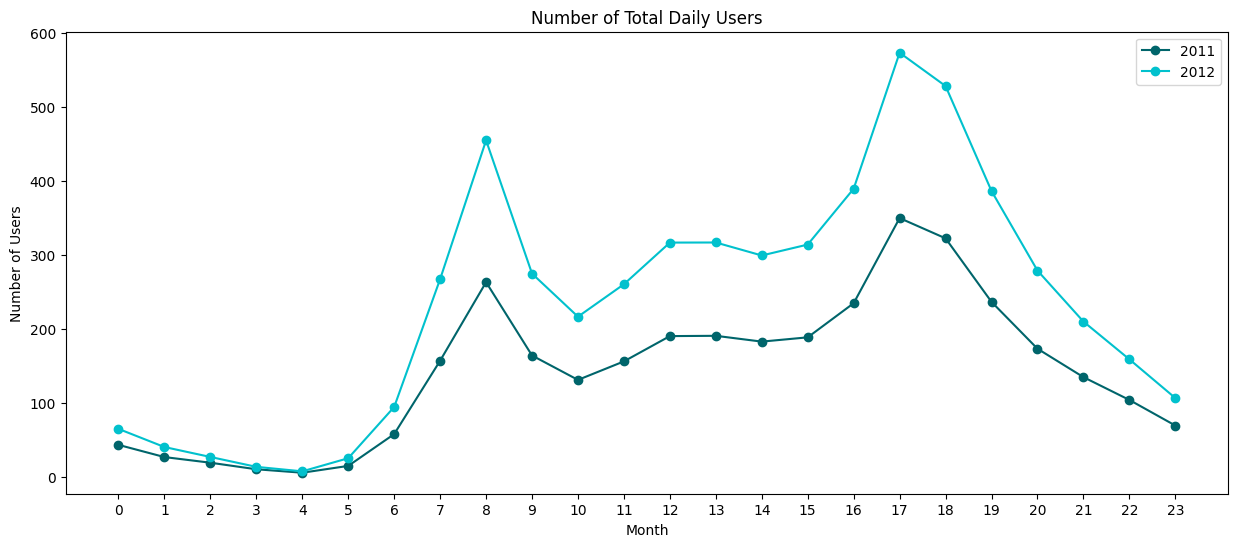

In [104]:
# Set the plot size
plt.figure(figsize=(15, 6))

# Split data into 2 years (2011 and 2012)
hour_2011 = hour_df[hour_df['yr'] == 2011]
hour_2012 = hour_df[hour_df['yr'] == 2012]

#seeing the count of Casual User, registered User, and Total User based on month for each years
daily_trend_2011 = hour_2011.groupby('hr').agg({'total':'mean'})
daily_trend_2012 = hour_2012.groupby('hr').agg({'total':'mean'})

# Making Line Plot for year 2011 and 2012
plt.plot(daily_trend_2011.index, daily_trend_2011['total'], marker='o', label='2011', color='#00656B')
plt.plot(daily_trend_2011.index, daily_trend_2012['total'], marker='o', label='2012', color='#01C1CD')

# Add lable and title
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Number of Total Daily Users')
plt.legend()

# Set x-axis ticks to show all values
plt.xticks(daily_trend_2011.index)

plt.show()

Based on the line chart above, we can see that the highest bike users in both years (2011 and 2012) are the same. It is in hour 17

###Further Analysis

**Forecasting 2 days ahead after 31 December 2012**

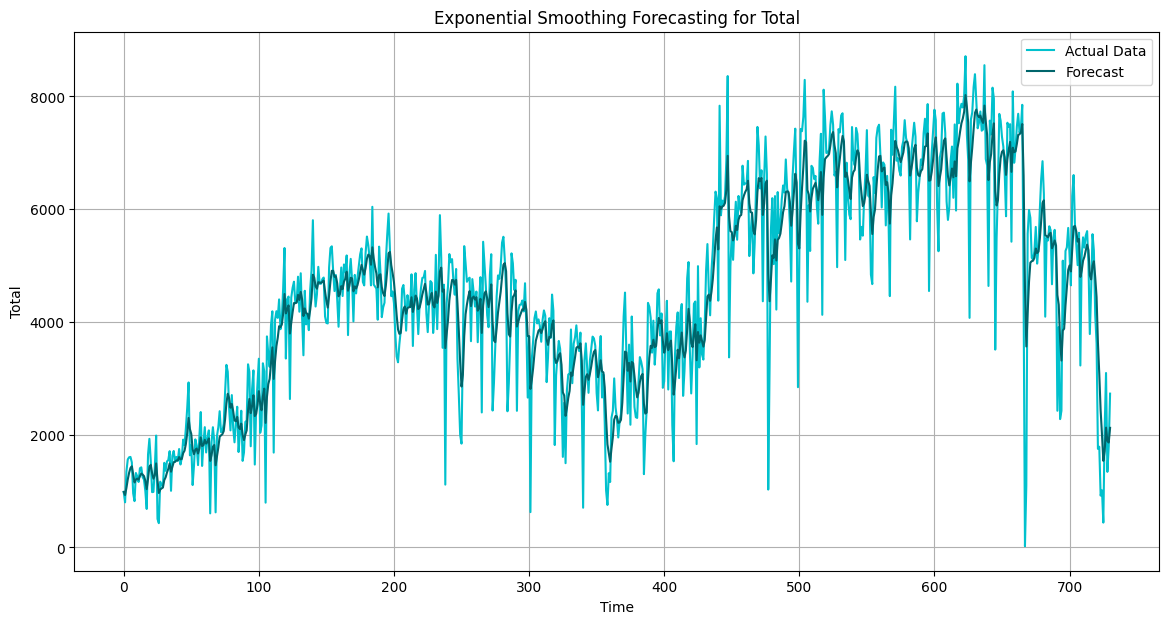

,Forecast
1,1780.895606
2,2121.993723


In [105]:
# Make a function of Exponential Smoothing

total = day_df['total']
def exponential_smoothing(data, alpha):
    forecasts = []
    forecasts.append(data[0])
    for t in range(1, len(data)):
        forecast = alpha * data[t] + (1 - alpha) * forecasts[t - 1]
        forecasts.append(forecast)
    return forecasts

# Forecasting Parameters
alpha = 0.3

# Perform Exponential Smoothing
forecast_values = exponential_smoothing(total, alpha)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(total, label='Actual Data', color='#01C1CD')
plt.plot(forecast_values, label='Forecast', color='#00656B')
plt.xlabel('Time')
plt.ylabel('Total')
plt.title('Exponential Smoothing Forecasting for Total')
plt.legend()
plt.grid(True)
plt.show()

# Forecasting for the next 30 days
last_observation = total[0]
forecast_2_days = []
for i in range(2):
    forecast = alpha * last_observation + (1 - alpha) * forecast_values[-1]
    forecast_2_days.append(forecast)
    last_observation = forecast_values[-1]

# Display forecast for the next 2 days as a table
forecast_table = pd.DataFrame({"Forecast": forecast_2_days})
forecast_table.index += 1  # Start index from 1
forecast_table

Based on the 2 time period of forecast above, we can see after december 2012 the trend of the total bike users tend to a bit uptrend. and the forecast pattern during following the actual data visually following the pattern.

## Conclusion

- Conclution pertanyaan 1:
From the boxplot 2011 above, we can see how the total number of bike users in 2011 is distributed and having some outliers in each month of the year, also the highest bike users is on June. also From the boxplot 2012, we can see how the total number of bike users in 2012 is distributed and having some outliers in each month of the year, also the highest bike users is on September.

- Conclution pertanyaan 2:
based on the line chart above, we can see that the trend of total bike users in 2011 is having uptrend until June, and having down after June to December. For total bike users in 2012 we can see that the trend is still indicating uptrend until September and have some sharp downtrend until December

- Conclution pertanyaan 3:
Based on the Bar plot above, we can see that the most total bike users in 2011 is on June and for the most total bike users in 2012 is on September

- Conclution pertanyaan 4:
Based on the year 2011 and 2012, both have the most users in Fall Season and have the least users in Spring Season.

- Conclution pertanyaan 5:
Based on the scatter plot 2011 above, we can see that while the total bike users is getting higher, the temperature is also getting higher. It means the correlation between total bike users and the temperature of the area has a positive correlation. It's supported by the high number of 0.77 indicates high positive correlation. Also the year of 2012, It's supported by the high number of 0.71 indicates high positive correlation

- Conclution pertanyaan 6:
Based on the line chart above, we can see that the highest bike users in both years (2011 and 2012) are the same. It is in hour 17

- conclution Further Analysis:
Based on the 10 time period of forecast above, we can see after december 2012 the trend of the total bike users tend to downtrend.

In [106]:
all_df.to_csv("all_data.csv", index=False)